In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from helper_functions import clean_data, model_statistics, plot_pred, extract_r_p

In [3]:
london = pd.read_csv('london_weekdays.csv')
london = clean_data(london)
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [4]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
x,y = extract_r_p(london)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

/opt/homebrew/Cellar/jupyterlab/3.6.2/libexec/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7227355839677202
Mean Squared Error (MSE) 	: 8038.907924760631



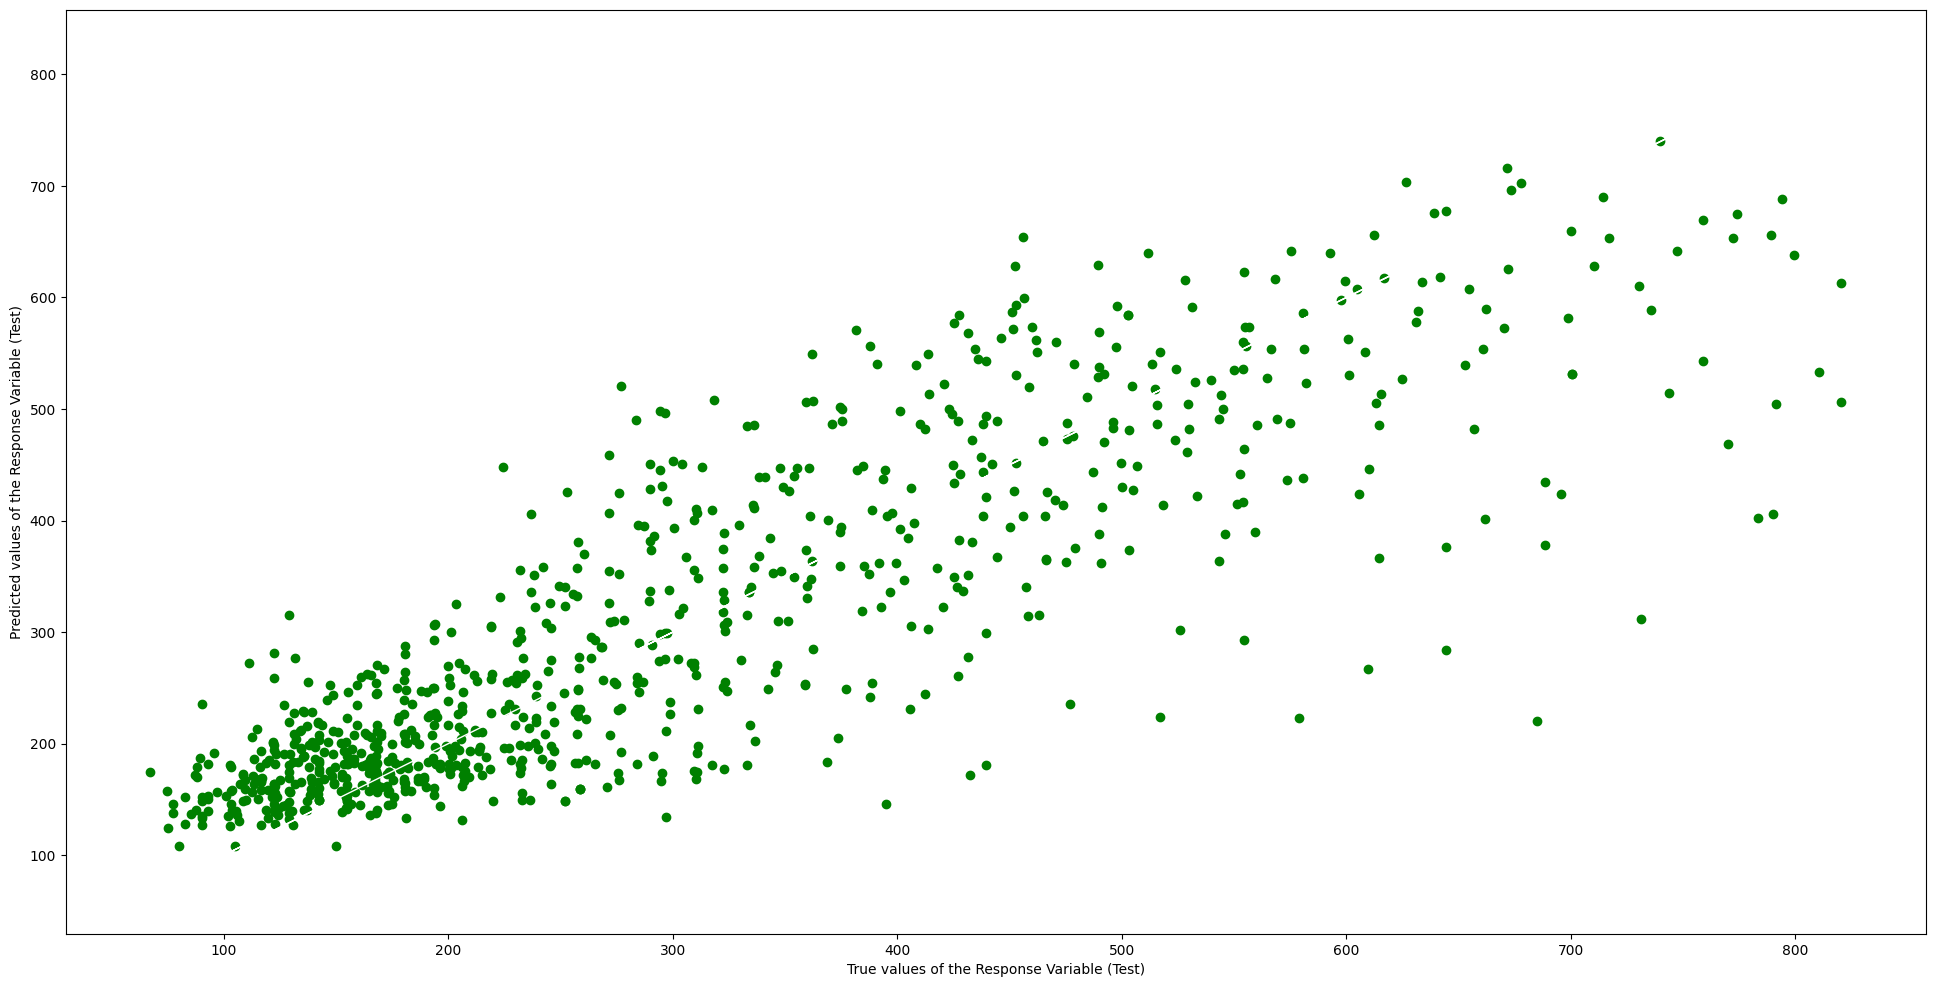

In [7]:
hgb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=10, random_state=42)
#hgb = HistGradientBoostingRegressor(max_iter=100, random_state=0)
hgb.fit(x_train, y_train)
y_test_pred = hgb.predict(x_test)

model_statistics(hgb, x_test, y_test, y_test_pred)

plot_pred(y_test, y_test_pred)


In [5]:
df = pd.DataFrame(london, index=x_test.index)
y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
y_pred_df.columns = ['predSum']
df = pd.concat([df, y_pred_df], axis=1)

In [6]:
underpriced1 = df.query('realSum < predSum')
overpriced1 = df.query('realSum > predSum')

In [7]:
underpriced1['guest_satisfaction_overall'].mean()


90.53469387755102

In [8]:
overpriced1['guest_satisfaction_overall'].mean()

90.2578125

# Gradient Boosting

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.666933520082795
Mean Squared Error (MSE) 	: 10246.64033527328



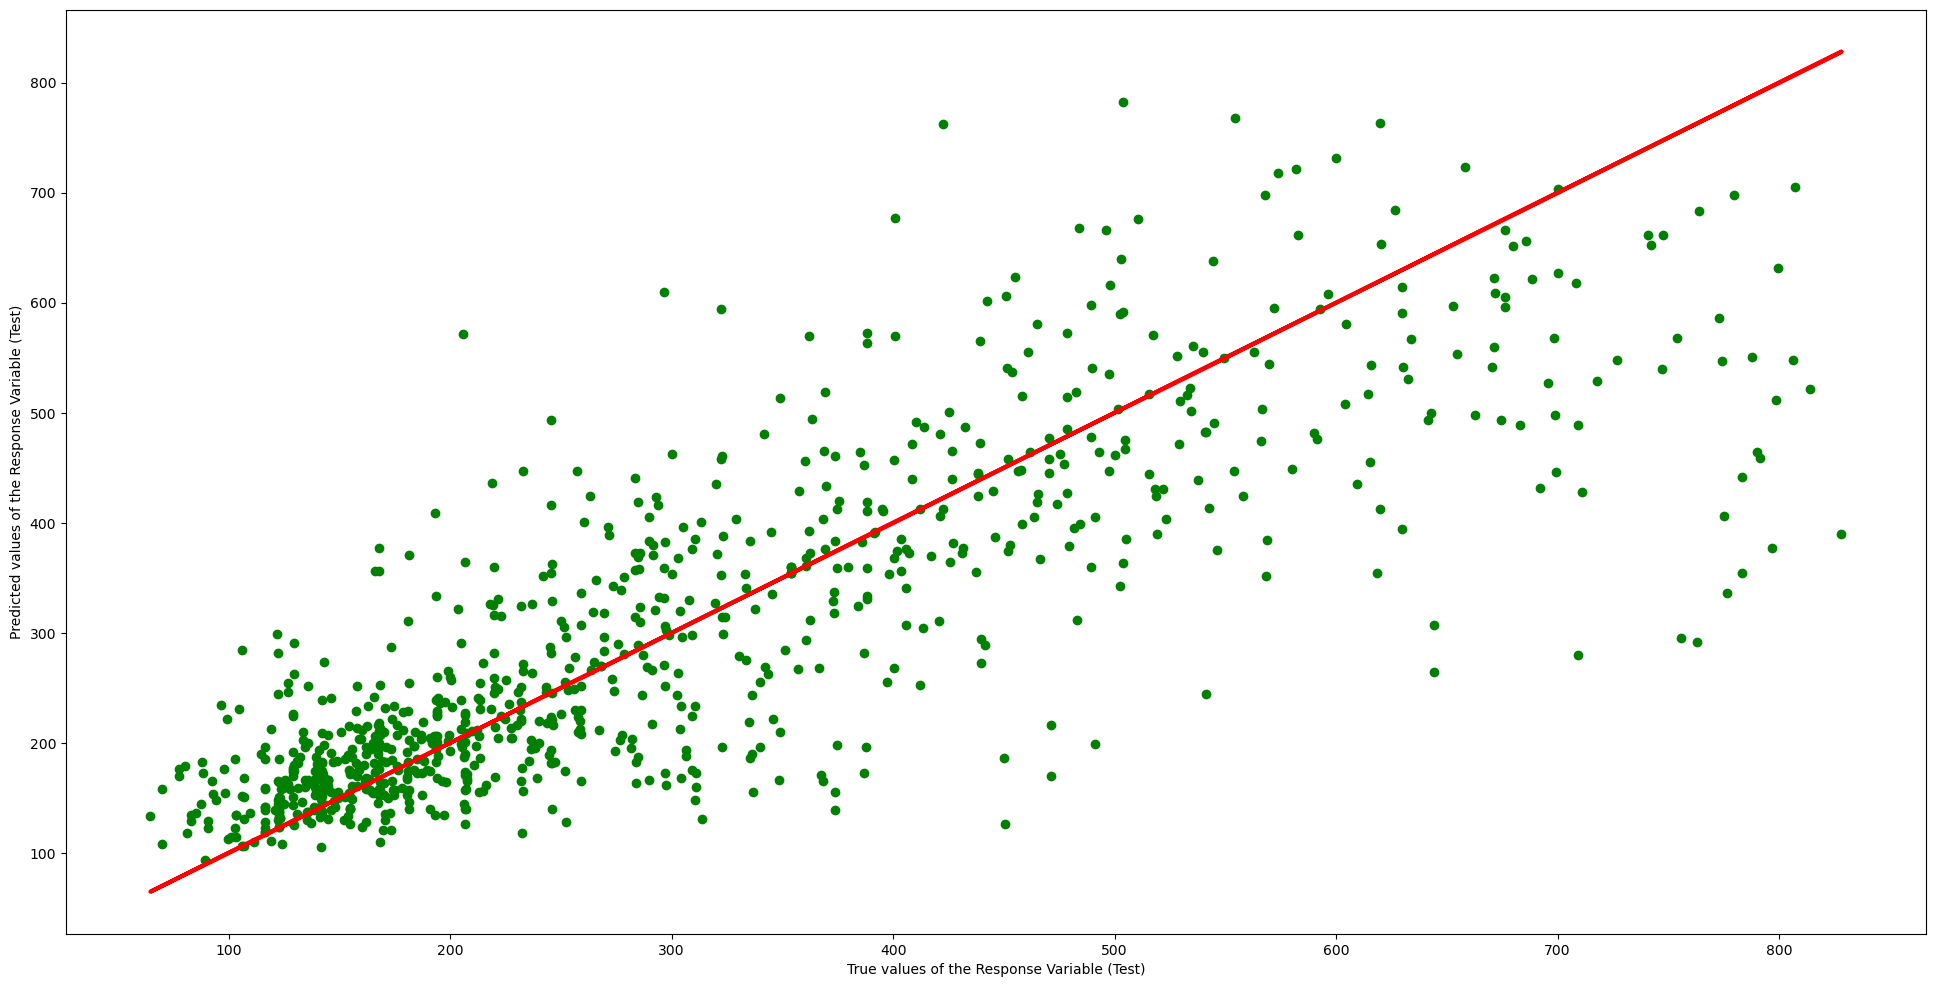

In [22]:
# gb = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1, max_depth = 10, random_state=42)
# gb.fit(x_train, y_train)
# y_test_pred = gb.predict(x_test)


# # Check the Goodness of Fit (on Test Data)
# print("Goodness of Fit of Model \tTest Dataset")
# print("Explained Variance (R^2) \t:", gb.score(x_test, y_test))
# print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
# print()

# # Plot the Predictions vs the True values
# f, axes = plt.subplots(1, 1, figsize=(24, 12))
# axes.scatter(y_test, y_test_pred, color = "green")
# axes.plot(y_test, y_test, linewidth = 3,color = "red")
# axes.set_xlabel("True values of the Response Variable (Test)")
# axes.set_ylabel("Predicted values of the Response Variable (Test)")
# plt.show()

In [23]:
# df = pd.DataFrame(london, index=x_test.index)
# y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
# y_pred_df.columns = ['predSum']
# df = pd.concat([df, y_pred_df], axis=1)

In [24]:
# underpriced = df.query('realSum < predSum')
# overpriced = df.query('realSum > predSum')

In [25]:
# underpriced['guest_satisfaction_overall'].mean()

89.76239669421487

In [29]:
# overpriced['guest_satisfaction_overall'].mean()

91.51538461538462